In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as pgo
from sklearn import cluster
import pandas as pd
from sklearn.decomposition import IncrementalPCA

In [2]:
history = pd.read_csv('user_history.csv')
history.shape

(4500, 101)

In [3]:
history.describe()

,USER ID,nectar prague,joshua sleep,gallery fiesta,jerome jazz,motif polo,zigzag germany,susan sonar,alamo group,gilbert chicken,...,pandora oval,cabinet state,cecilia raja,memo darwin,enigma recycle,olivia image,world blonde,begin unit,rodeo santana,drum spring
count,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,...,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000
mean,113376.351778,1.865722,1.638220,1.143836,0.985400,1.216889,2.272874,2.374980,1.043467,1.578136,...,1.627423,1.036980,1.841324,1.875481,1.132869,2.113052,1.509319,0.700393,0.824720,0.686132
std,7184.873215,0.937386,1.301395,0.743591,0.712322,0.794407,2.134627,1.677591,0.717391,1.324045,...,1.128374,0.873155,1.144434,1.312701,0.697700,0.483498,0.805120,0.410686,0.502802,0.537353
min,100953.000000,0.000558,0.000111,0.000072,0.000407,0.000103,0.000347,0.000068,0.000327,0.000288,...,0.001380,0.000017,0.000060,0.000289,0.000358,0.411463,0.000562,0.000098,0.000784,0.000001
25%,107134.000000,1.096461,0.481934,0.466599,0.377794,0.562622,0.399109,0.806781,0.461352,0.504135,...,0.665749,0.280598,0.785005,0.418055,0.563602,1.787143,0.618802,0.328835,0.406434,0.249143
50%,113286.000000,1.956605,1.250749,1.101720,0.850522,1.107225,1.335345,2.102481,0.932965,1.002327,...,1.408540,0.706805,1.890321,1.934150,1.065851,2.116222,1.839018,0.734343,0.803667,0.548355
75%,119607.250000,2.587191,3.002011,1.780516,1.498610,1.811398,4.952487,4.044239,1.533543,2.959773,...,2.528821,2.012495,2.770093,3.163269,1.650293,2.443463,2.138760,1.017411,1.198217,1.049258
max,125976.000000,4.521661,5.153343,3.125105,3.748970,4.089940,6.759219,6.565286,3.897725,5.177968,...,5.339951,3.002520,5.688518,4.505662,3.267691,3.696181,2.965128,1.895920,2.674754,2.818771


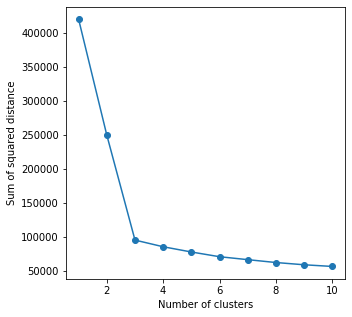

In [4]:
# elbow method
sse = []
list_k = list(range(1, 11))

for k in list_k:
    km = cluster.KMeans(n_clusters=k)
    km.fit(history.drop(['USER ID'], axis=1)) # we need to drop the first column(user id)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(5, 5))
plt.plot(list_k, sse, '-o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distance')
plt.show()

In [5]:
# According to elbow method, the best k should be 3
kmeans = cluster.KMeans(3) 
kmeans.fit(history.drop(['USER ID'], axis=1))
kmeans_y = kmeans.predict(history.drop(['USER ID'], axis=1))

In [6]:
# Seperate first 3000 users by their labels
# Create three arrays for each cluster/group of users
First_Group = []
Second_Group = []
Third_Group = []

for i in range(3000): 
    if kmeans.labels_[i] == 0:
        First_Group.append(history['USER ID'].iloc[i])
    if kmeans.labels_[i] == 1:
        Second_Group.append(history['USER ID'].iloc[i])
    if kmeans.labels_[i] == 2:
        Third_Group.append(history['USER ID'].iloc[i])
        
First_Group = np.asarray(First_Group)
Second_Group = np.asarray(Second_Group)
Third_Group = np.asarray(Third_Group)

In [7]:
print(Third_Group)

[100976 101001 101021 ... 117457 117488 117517]
